# Padaria Portugesa Geolocation

In [93]:
# classic import
import pandas as pd
from shapely.geometry import Polygon, Point
import geopandas as gp
import matplotlib.pyplot as plt

In [135]:
# open data and change projection to meters
freguesias = gp.read_file('data/freguesias.shp')
padarias = pd.read_csv('data/padarias.csv', index_col=0)
padarias.drop_duplicates(subset='restaurant.name', inplace=True)

In [136]:
freguesias = freguesias.to_crs('EPSG:3763')

C:\Users\Zaca\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [137]:
freguesias = freguesias[['NOME', 'AREA_M2', 'geometry']]

In [138]:
points = gp.GeoDataFrame(padarias, geometry=gp.points_from_xy(padarias['restaurant.location.longitude'], padarias['restaurant.location.latitude']))
points.crs = {'init' :'epsg:4326'}

points = points.to_crs('EPSG:3763')

C:\Users\Zaca\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [139]:
padarias

,restaurant.R.has_menu_status.delivery,restaurant.R.has_menu_status.takeaway,restaurant.R.res_id,restaurant.apikey,restaurant.id,restaurant.name,restaurant.url,restaurant.location.address,restaurant.location.locality,restaurant.location.city,...,restaurant.deeplink,restaurant.is_table_reservation_supported,restaurant.has_table_booking,restaurant.events_url,restaurant.phone_numbers,restaurant.all_reviews.reviews,restaurant.establishment,restaurant.establishment_types,restaurant.zomato_events,geometry
0,-1,-1,8202177,94974ff7db6ffeda0e1f9c75375ebca0,8202177,A Padaria Portuguesa - Duque D'Ávila,https://www.zomato.com/apadariaportuguesaduque...,"Avenida Duque D&#039;Ávila, 24A, Saldanha, Lisboa",Saldanha,Lisboa,...,zomato://restaurant/8202177,0,0,https://www.zomato.com/apadariaportuguesaduque...,926967076,"[{'review': []}, {'review': []}, {'review': []...",['Pastry Shop'],[],NaN,POINT (-9.14402 38.73503)
1,-1,-1,8200872,94974ff7db6ffeda0e1f9c75375ebca0,8200872,A Padaria Portuguesa - Camões,https://www.zomato.com/apadariaportuguesacamoe...,"Praça Luís de Camões, 44, Chiado, Lisboa",Chiado,Lisboa,...,zomato://restaurant/8200872,0,0,https://www.zomato.com/apadariaportuguesacamoe...,964930824,"[{'review': []}, {'review': []}, {'review': []...",['Pastry Shop'],[],NaN,POINT (-9.14321 38.71111)
2,-1,-1,8201909,94974ff7db6ffeda0e1f9c75375ebca0,8201909,A Padaria Portuguesa - Barata Salgueiro,https://www.zomato.com/apadariaportuguesabarat...,"Rua Mouzinho da Silveira, 2, Avenida da Liberd...",Avenida da Liberdade,Lisboa,...,zomato://restaurant/8201909,0,0,https://www.zomato.com/apadariaportuguesabarat...,967259104,"[{'review': []}, {'review': []}, {'review': []...",['Pastry Shop'],[],NaN,POINT (-9.14896 38.72159)
3,-1,-1,8201148,94974ff7db6ffeda0e1f9c75375ebca0,8201148,A Padaria Portuguesa - Campo de Ourique,https://www.zomato.com/apadariaportuguesacouri...,"Rua 4 de Infantaria, 30A, Campo de Ourique, Li...",Campo de Ourique,Lisboa,...,zomato://restaurant/8201148,0,0,https://www.zomato.com/apadariaportuguesacouri...,924450818,"[{'review': []}, {'review': []}, {'review': []...",['Pastry Shop'],[],NaN,POINT (-9.16477 38.71842)
4,-1,-1,8212526,94974ff7db6ffeda0e1f9c75375ebca0,8212526,A Padaria Portuguesa - António Augusto Aguiar,https://www.zomato.com/apadariaportuguesaaaagu...,"Avenida António Augusto Aguiar, 102, Praça de ...",Marquês de Pombal,Lisboa,...,zomato://restaurant/8212526,0,0,https://www.zomato.com/apadariaportuguesaaaagu...,961656249,"[{'review': []}, {'review': []}, {'review': []...",['Pastry Shop'],[],NaN,POINT (-9.15185 38.73190)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,-1,-1,19279358,94974ff7db6ffeda0e1f9c75375ebca0,19279358,A Padaria Portuguesa - Residence,https://www.zomato.com/grande-lisboa/a-padaria...,"Avenida Fontes Pereira de Melo, 42E, Saldanha,...",Saldanha,Lisboa,...,zomato://restaurant/19279358,0,0,https://www.zomato.com/grande-lisboa/a-padaria...,967123174,[{'review': []}],['Pastry Shop'],[],NaN,POINT (-9.14566 38.73197)
18,-1,-1,18325349,94974ff7db6ffeda0e1f9c75375ebca0,18325349,A Padaria Portuguesa - Cacém,https://www.zomato.com/grande-lisboa/a-padaria...,"Avenida Bons Amigos, 7B, Cacém, Sintra",Cacém,Lisboa,...,zomato://restaurant/18325349,0,0,https://www.zomato.com/grande-lisboa/a-padaria...,962637535,"[{'review': []}, {'review': []}, {'review': []...",['Pastry Shop'],[],NaN,POINT (-9.29795 38.76839)
0,-1,-1,18657418,94974ff7db6ffeda0e1f9c75375ebca0,18657418,A Padaria Portuguesa - LAB,https://www.zomato.com/grande-lisboa/a-padaria...,"Avenida da República, 39",Campo Pequeno,Lisboa,...,zomato://restaurant/18657418,0,0,https://www.zomato.com/grande-lisboa/a-padaria...,"21 7931571, 969253277","[{'review': []}, {'review': []}, {'review': []...",['Pastry Shop'],[],NaN,POINT (-9.14600 38.73762)
6,-1,-1,19291119,94974ff7db6ffeda0e1f9c75375ebca0,19291119,A Padaria Portuguesa - Expo Sul,https://www.zomato.com/grande-lisboa/a-padaria...,"Avenida Dom João II, 14, Parque d

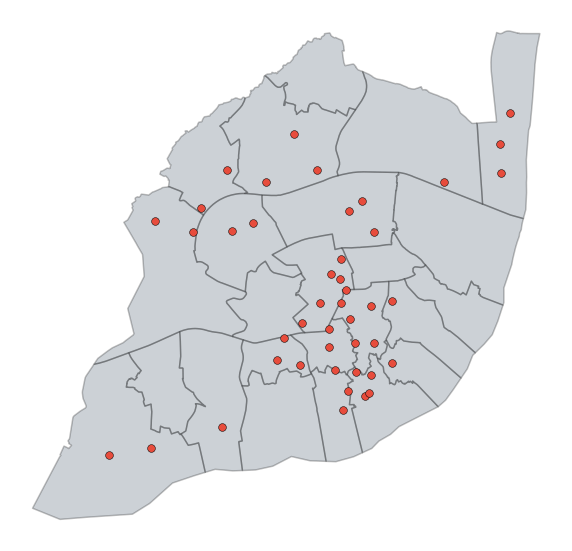

In [142]:
# remove points outside the city
points = points[points.geometry.within(freguesias.unary_union)]

base = freguesias.plot(figsize=(10, 10), facecolor='#34495e', edgecolor='black', linewidth= 1.5, alpha=.25)
points.plot(ax=base, marker='o', color='#e74c3c', markersize=60, edgecolor='k', linewidth=.5)
base.axis('off');

In [151]:
radius = gp.GeoDataFrame(geometry=points.buffer(500))

TypeError: unhashable type: 'Polygon'

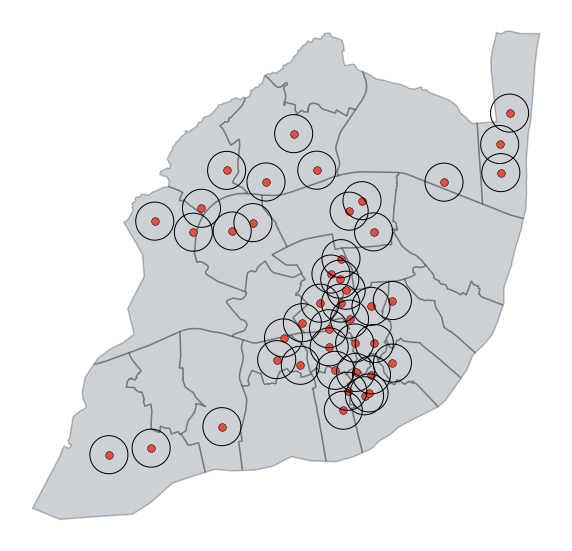

In [160]:
base = freguesias.plot(figsize=(10, 10), facecolor='#34495e', edgecolor='k', linewidth= 1.5, alpha=.25)
points.plot(ax=base, marker='o', color='#e74c3c', markersize=60, edgecolor='k', linewidth=.5)
base.axis('off');
radius.plot(ax=base, facecolor='none', edgecolor='k')

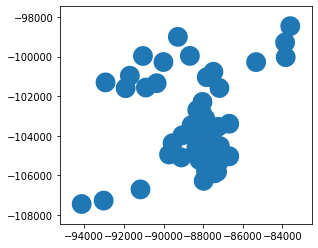

In [159]:
gp.GeoSeries(radius.unary_union).plot()

In [78]:
freguesias[freguesias['NOME'] == 'Santo António']['geometry'].area

0    1.494327e+06
dtype: float64

0     LINEARRING (-87984.966 -103872.522, -87910.453...
1     LINEARRING (-83625.133 -96313.225, -83623.619 ...
2     LINEARRING (-86269.606 -100086.568, -86239.316...
3     LINEARRING (-92184.401 -105165.004, -92179.992...
4     LINEARRING (-86130.161 -102737.641, -86220.902...
5     LINEARRING (-87136.353 -104822.699, -87131.692...
6     LINEARRING (-86521.321 -100028.836, -86522.877...
7     LINEARRING (-93305.184 -105254.426, -93331.293...
8     LINEARRING (-89382.497 -105267.782, -89377.497...
9     LINEARRING (-86951.029 -103668.470, -86955.929...
10    LINEARRING (-88210.538 -96488.384, -88198.338 ...
11    LINEARRING (-88195.251 -102018.091, -88191.021...
12    LINEARRING (-90553.597 -98068.927, -90554.008 ...
13    LINEARRING (-90102.874 -100621.442, -90110.474...
14    LINEARRING (-86130.161 -102737.641, -86085.648...
15    LINEARRING (-89861.890 -102615.097, -89841.140...
16    LINEARRING (-90877.710 -104338.609, -90867.047...
17    LINEARRING (-89097.971 -104503.699, -89073